In [187]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Study the dataset

In [188]:
df = pd.read_csv("final.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2,3,22615.0,5410.0,7198.0,NaN,1777.0,NaN


## Do proper data preparation

In [189]:
X = df.iloc[:,2:].values
X.shape

(440, 6)

In [191]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,439.000000,438.000000,438.000000,438.000000,439.000000,439.000000
mean,1.322727,2.543182,12010.369021,5802.043379,7960.041096,3074.374429,2882.633257,1516.533030
std,0.468052,0.774272,12659.991699,7392.448252,9523.408318,4864.741417,4773.234058,2817.889215
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3119.500000,1541.250000,2149.000000,738.750000,256.500000,407.500000
50%,1.000000,3.000000,8533.000000,3627.000000,4755.500000,1526.000000,813.000000,964.000000
75%,2.000000,3.000000,16934.500000,7176.000000,10675.250000,3543.500000,3935.000000,1803.500000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [155]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(X)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [156]:
X = imputer.transform(X)

In [157]:
scaler = StandardScaler()
x = scaler.fit(X)
X= scaler.transform(X)
X

array([[ 0.05214324,  0.5231234 , -0.04204466, -0.58999556, -0.04380867,
        -0.06350149],
       [-0.39215391,  0.54402686,  0.16942136, -0.27069711,  0.08616853,
         0.09228847],
       [-0.44788897,  0.40801867, -0.02908486, -0.13806862,  0.13299393,
         2.25058414],
       ...,
       [ 0.19955616,  1.31473991,  2.3478269 , -0.54399844,  2.51100987,
         0.12465579],
       [-0.13620012, -0.51865587, -0.60353066, -0.42003308, -0.57001688,
         0.21642248],
       [-0.73020608, -0.55706936, -0.57423941, -0.62072907, -0.50513327,
        -0.52091221]])

In [158]:
np.unique(y)

array([1, 2, 3], dtype=int64)

## Apply K-Means Clustering with random initial centroids.

In [160]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k, init='random', random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 4, 4, 0, 3, 0, 0, 0, 0, 4, 4, 0, 3, 4, 4, 0, 4, 0, 0, 0, 0, 0,
       3, 1, 4, 0, 0, 0, 4, 3, 0, 0, 0, 3, 0, 4, 3, 4, 4, 3, 3, 0, 4, 4,
       4, 4, 4, 2, 4, 4, 0, 0, 3, 4, 3, 0, 2, 4, 0, 0, 0, 2, 0, 4, 0, 2,
       0, 4, 0, 0, 3, 3, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 2, 2, 3,
       0, 3, 0, 0, 2, 3, 4, 0, 0, 0, 0, 0, 4, 4, 0, 3, 0, 0, 4, 4, 0, 4,
       0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4,
       3, 0, 0, 0, 0, 1, 4, 1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 3, 3, 4,
       0, 0, 4, 4, 3, 0, 0, 4, 0, 0, 0, 4, 0, 2, 0, 0, 4, 4, 4, 0, 4, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 0, 3, 4, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       4, 4, 4, 3, 4, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,

## Using the following two ways to find the best number of clusters

In [161]:
y_pred.shape

(440,)

In [162]:
y_pred is kmeans.labels_

True

In [163]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [164]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4])

In [165]:
kmeans.cluster_centers_

array([[-2.54285124e-01, -3.82083529e-01, -4.37388076e-01,
        -1.69239753e-01, -3.97234229e-01, -1.97536529e-01],
       [ 3.16768594e+00,  3.51476055e+00,  1.10956008e+00,
         5.51782496e+00, -3.85591889e-02,  6.45202252e+00],
       [ 3.13076770e-01,  3.92366739e+00,  4.27534966e+00,
        -4.07877563e-03,  4.61798450e+00,  5.07301554e-01],
       [ 1.49978383e+00, -2.20156654e-01, -2.73385138e-01,
         8.18522577e-01, -4.26426641e-01,  2.41992153e-01],
       [-5.14687925e-01,  6.45236956e-01,  8.97480533e-01,
        -3.37098644e-01,  9.06433115e-01,  5.05992421e-02]])

### Plot the inertia as a function of the number of clusters. Choose the best number of clusters by observing the “elbow”.

In [166]:
kmeans.inertia_

1085.9478222775695

In [167]:
kmeans_per_k = [KMeans(n_clusters=k,init = 'random', random_state=42).fit(X)
               for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [168]:
kmeans_per_k

[KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=1,
        n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
        tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
        n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
        tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
        n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
        tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
        n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
        tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
        n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
        tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, i

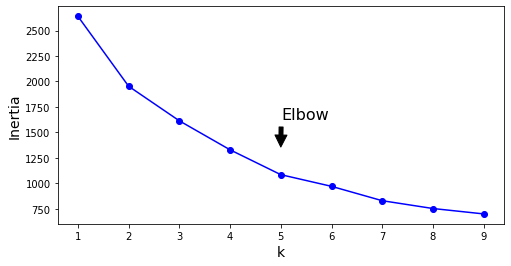

In [169]:
# plot inertia as a function of k and analyze the resulting curve.
plt.figure(figsize=(8,4))
plt.plot(range(1,10), inertias, 'bo-')
plt.xlabel('k', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow',
            xy=(5,inertias[3]), 
            xytext=(0.55, 0.55),
            textcoords="figure fraction",
            fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

### Selecting the best number of clusters using the silhouette score.

In [170]:
# plot the silhouette score as a function of k
silhouette_score(X, kmeans.labels_)

0.36072114202813554

In [171]:
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]   # kmeans_per_k[0] is 1 cluster, not considered

In [172]:
silhouette_scores

[0.5677770275055144,
 0.34037932421779776,
 0.3536640857160256,
 0.36072114202813554,
 0.35933818584086513,
 0.3360219692870483,
 0.3094181715282594,
 0.2496125059921561]

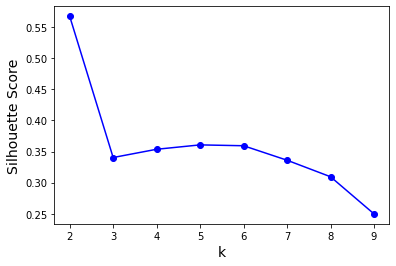

In [173]:
# plot the silhouette score as a function of k
plt.plot(range(2,10), silhouette_scores, 'bo-')
plt.xlabel('k', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.show()

## Set the optimum number of clusters and fit the model.

In [174]:
k=5
kmeans = KMeans(n_clusters=k, init = 'random', random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 4, 4, 0, 3, 0, 0, 0, 0, 4, 4, 0, 3, 4, 4, 0, 4, 0, 0, 0, 0, 0,
       3, 1, 4, 0, 0, 0, 4, 3, 0, 0, 0, 3, 0, 4, 3, 4, 4, 3, 3, 0, 4, 4,
       4, 4, 4, 2, 4, 4, 0, 0, 3, 4, 3, 0, 2, 4, 0, 0, 0, 2, 0, 4, 0, 2,
       0, 4, 0, 0, 3, 3, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 2, 2, 3,
       0, 3, 0, 0, 2, 3, 4, 0, 0, 0, 0, 0, 4, 4, 0, 3, 0, 0, 4, 4, 0, 4,
       0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4,
       3, 0, 0, 0, 0, 1, 4, 1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 3, 3, 4,
       0, 0, 4, 4, 3, 0, 0, 4, 0, 0, 0, 4, 0, 2, 0, 0, 4, 4, 4, 0, 4, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 0, 3, 4, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       4, 4, 4, 3, 4, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,

## Display the value count of points in each of the above-formed clusters

In [175]:
unique, counts = np.unique(y_pred, return_counts=True)
print("Clust","Count")
print(np.asarray((unique, counts)).T)

Clust Count
[[  0 263]
 [  1   4]
 [  2  10]
 [  3  67]
 [  4  96]]


## Again apply K-Means++ Clustering completing the above tasks 4),5),6)

In [176]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [177]:
ypred = kmeans.fit_predict(X)
ypred

array([0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       3, 2, 2, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 2, 3, 2, 2, 3, 3, 0, 2, 2,
       2, 2, 2, 4, 2, 2, 0, 0, 3, 2, 0, 0, 4, 2, 0, 0, 0, 4, 0, 2, 0, 4,
       0, 2, 0, 0, 3, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 4, 4, 3,
       0, 3, 0, 0, 4, 3, 2, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 2, 2, 0, 2,
       0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       3, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 3, 3, 2,
       0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 4, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 4, 0, 3, 2, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,

In [178]:
kmeans.cluster_centers_

array([[-2.25787326e-01, -3.82219891e-01, -4.36078497e-01,
        -1.64940648e-01, -3.96842819e-01, -1.90499973e-01],
       [ 1.96629442e+00,  5.17807822e+00,  1.28649297e+00,
         6.90155472e+00, -5.55108349e-01,  1.65131910e+01],
       [-4.95298086e-01,  6.87446832e-01,  9.11091178e-01,
        -3.28022977e-01,  9.07161480e-01,  1.05585897e-01],
       [ 1.67161160e+00, -1.10129959e-01, -2.14959194e-01,
         1.11819927e+00, -4.05932822e-01,  3.21016777e-01],
       [ 3.13076770e-01,  3.92366739e+00,  4.27534966e+00,
        -4.07877563e-03,  4.61798450e+00,  5.07301554e-01]])

In [179]:
kmeans.inertia_

1058.6645620189288

In [180]:
kmeans_per_k = [KMeans(n_clusters=k,init = 'k-means++', random_state=42).fit(X)
               for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]
kmeans_per_k

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto',

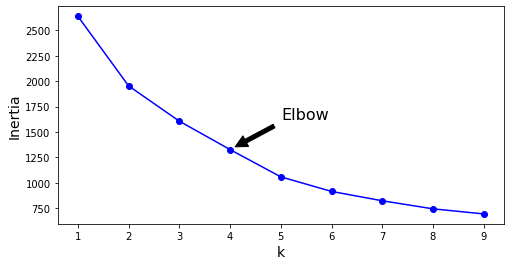

In [199]:
# plot inertia as a function of k and analyze the resulting curve.
plt.figure(figsize=(8,4))
plt.plot(range(1,10), inertias, 'bo-')
plt.xlabel('k', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow',
            xy=(4,inertias[3]), 
            xytext=(0.55, 0.55),
            textcoords="figure fraction",
            fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

In [182]:
# plot the silhouette score as a function of k
silhouette_score(X, kmeans.labels_)

0.3699151378581946

In [183]:
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]   # kmeans_per_k[0] is 1 cluster, not considered
silhouette_scores

[0.6141280269407219,
 0.538790216376685,
 0.39820204928189296,
 0.3699151378581946,
 0.37838381537724297,
 0.32015779818901574,
 0.29319641223698173,
 0.3256622349218468]

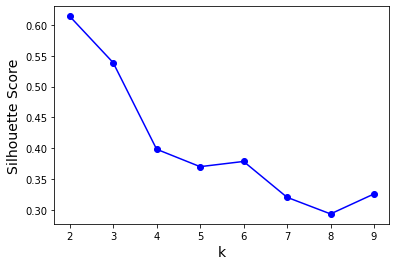

In [184]:
# plot the silhouette score as a function of k
plt.plot(range(2,10), silhouette_scores, 'bo-')
plt.xlabel('k', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.show()

In [185]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
ypred = kmeans.fit_predict(X)
ypred

array([0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       3, 2, 2, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 2, 3, 2, 2, 3, 3, 0, 2, 2,
       2, 2, 2, 4, 2, 2, 0, 0, 3, 2, 0, 0, 4, 2, 0, 0, 0, 4, 0, 2, 0, 4,
       0, 2, 0, 0, 3, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 4, 4, 3,
       0, 3, 0, 0, 4, 3, 2, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 2, 2, 0, 2,
       0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       3, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 3, 3, 2,
       0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 4, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 4, 0, 3, 2, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,

In [186]:
unique, counts = np.unique(ypred, return_counts=True)
print("Clust","Count")
print(np.asarray((unique, counts)).T)

Clust Count
[[  0 271]
 [  1   1]
 [  2  96]
 [  3  62]
 [  4  10]]
